# Telco Customer Churn Classification Analysis


***Developing ML models for predicting customer attrition and giving possible insights to retention strategies***

## 1.0 Business Understanding

This project aims to analyze customer churn in a telecommunication company using classification models. We will explore and analyze the provided datasets to gain insights into factors influencing customer attrition or churn. The goal is to build machine learning models capable of predicting customer churn and offer valuable insights to the company for strategic decision-making.

The main objective is to identify and understand factors influencing customer churn in the telecommunication industry. We aim to build effective classification models for predicting customer churn.

## 1.1 Explanation of features

#### The following describes the columns present in the data.

1.	Gender -- Whether the customer is a male or a female
2.	SeniorCitizen -- Whether a customer is a senior citizen or not
3.	Partner -- Whether the customer has a partner or not (Yes, No)
4.	Dependents -- Whether the customer has dependents or not (Yes, No)
5.	Tenure -- Number of months the customer has stayed with the company
6.	Phone Service -- Whether the customer has a phone service or not (Yes, No)
7.	MultipleLines -- Whether the customer has multiple lines or not
8.	InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)
9.	OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)
10.	OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)
11.	DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)
12.	TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)
13.	StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)
14.	StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)
15.	Contract -- The contract term of the customer (Month-to-Month, One year, Two year)
16.	PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)
17.	Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))
18.	MonthlyCharges -- The amount charged to the customer monthly
19.	TotalCharges -- The total amount charged to the customer
20.	Churn -- Whether the customer churned or not (Yes or No)


 ## 1.2 Hypothesis (Null and Alternate)

- Null Hypothesis (H0): There is no significant relationship between the Total Charges and customer churn.
- Alternate Hypothesis (H1): There is a significant relationship between the Total Charges and customer churn.

## 1.3 Analytical questions

   - How do different services (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, etc.) contribute to customer churn?
   - Is there any correlation between gender, age (SeniorCitizen), having a partner, having dependents, and customer churn?
   - How does the contract type (Contract) and billing preferences (PaperlessBilling, PaymentMethod) influence customer churn?
   - Is there a correlation between monthly charges (MonthlyCharges), total charges (TotalCharges), and customer churn?
   - What insights can be gained from the analysis to improve customer retention?

## 2.0 Data Understanding

In [1]:
# %pip install pyodbc  
# %pip install python-dotenv
# %pip install imbalanced-learn
# %pip install seaborn

## 2.1 Importations

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from dotenv import dotenv_values

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer


# Database connection
import pyodbc

# Ignore warnings (optional)
import warnings
warnings.filterwarnings("ignore")

## 2.2 Data Loading

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

# Use the connect method of the pyodbc library and pass in the connection string.

connection = pyodbc.connect(connection_string)

# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = "Select * from dbo.LP2_Telco_churn_first_3000"
df1 = pd.read_sql(query, connection)
df1.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [4]:
# Loaded from OneDrive

testing_dataset=pd.read_csv("Telco-churn-second-2000.csv")
testing_dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [5]:
# URL of the testing dataset on GitHub
Url = 'https://github.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/raw/main/LP2_Telco-churn-second-2000.csv'

# Load the testing dataset into a DataFrame
df2 = pd.read_csv(Url)

# Display the first few rows of the testing dataset
df2.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


## 2.3 Exploratory Data Analysis (EDA)

 ### 2.3.1. Exploring data (info, duplicated, null values, describe)

In [6]:
df1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True


In [7]:
df2.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


## Data Standadization

Aligh
-SenioCitizen column- Data Type
- Partner Column
- Dependents Columns
- Phone Servises
-


In [10]:
# Concatenating the two datasets vertically (along rows)
concat_df = pd.concat([df1, df2], ignore_index=True)

concat_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [11]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [12]:

concat_df.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [13]:
concat_df.duplicated().sum()

0

In [14]:
concat_df["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [15]:
concat_df["tenure"].max()

72

In [16]:
concat_df["tenure"].min()

0

In [17]:
concat_df["TotalCharges"].unique()

array([29.850000381469727, 1889.5, 108.1500015258789, ..., '346.45',
       '306.6', '6844.5'], dtype=object)

In [18]:
concat_df["MonthlyCharges"].unique()

array([ 29.85000038,  56.95000076,  53.84999847, ...,  78.7       ,
        60.65      , 103.2       ])

In [19]:
concat_df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

**** Check for NAN in Int and Float data types

In [20]:
concat_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


Variability and Spread:

SeniorCitizen:

Insight: The standard deviation is 0.37, indicating some variability in the distribution of senior citizen status.
Further Action: To consider investigating factors contributing to variability and their potential impact.

Tenure:

Insight: The standard deviation is 24.53, suggesting a considerable spread in tenure values.
Further Action: To explore factors influencing the wide range of tenure, such as customer retention strategies.

MonthlyCharges:

Insight: The standard deviation is 30.07, indicating notable variability in monthly charges.
Further Action: To investigate factors contributing to variations in monthly charges and their implications for customer behavior.

In [21]:
concat_df.describe(include = "object").T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
Partner,5043,4,False,1538
Dependents,5043,4,False,2070
PhoneService,5043,4,True,2731
MultipleLines,4774,5,False,1437
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,5,False,1478
OnlineBackup,4392,5,False,1320
DeviceProtection,4392,5,False,1296


### 2.3.2. Univariate, Bi-variate, Multi-variate Analysis

### 2.3.2.1 Univariate Analysis

In [22]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


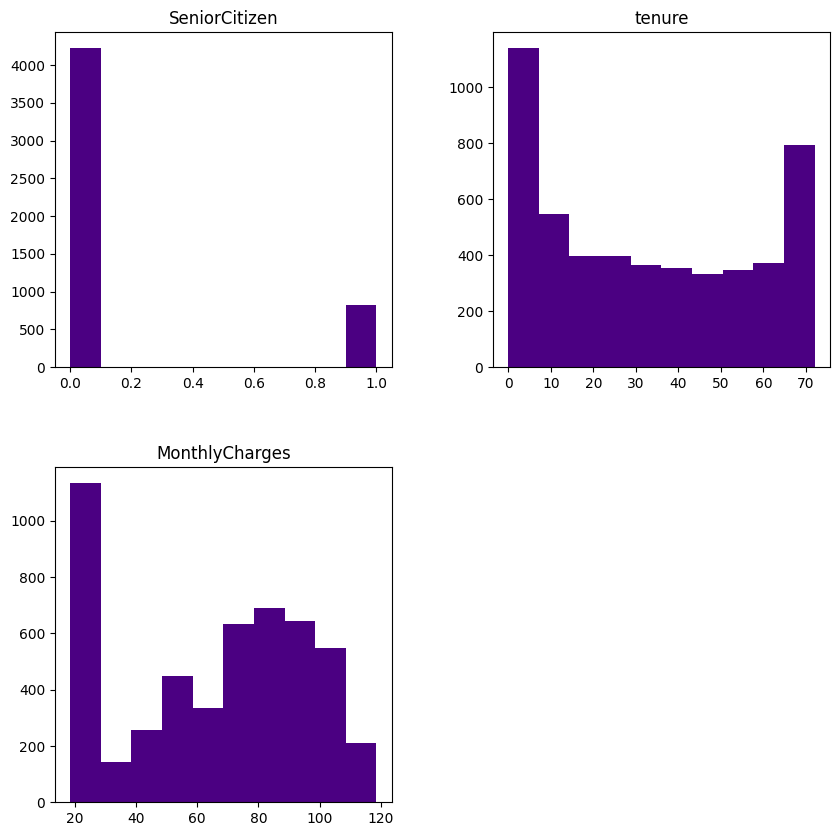

In [23]:
concat_df.hist(figsize=(10,10),grid=False,color = 'indigo')
plt.show()

The numerical columns depicted by the histogram depict abnormal distribution, some like the monthly charges column are negatively skewed and will need nomalization in the data preparation phase

### Further Observation using KDE plot

<Axes: ylabel='Density'>

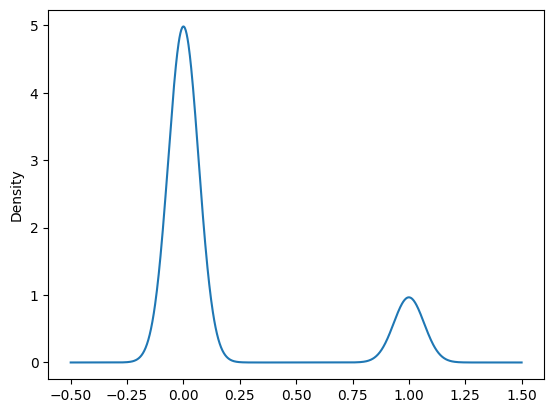

In [24]:
concat_df["SeniorCitizen"].plot(kind= "kde")

<Axes: ylabel='Density'>

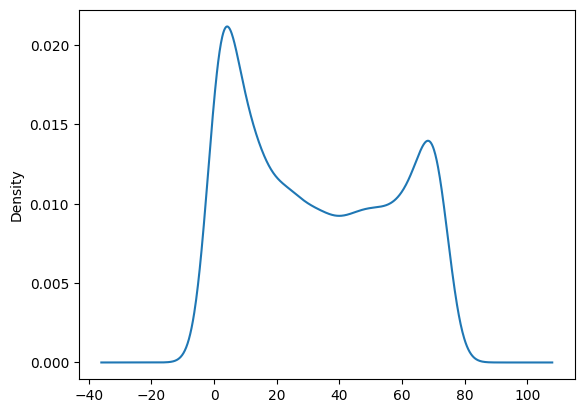

In [25]:
concat_df["tenure"].plot(kind= "kde")

<Axes: ylabel='Density'>

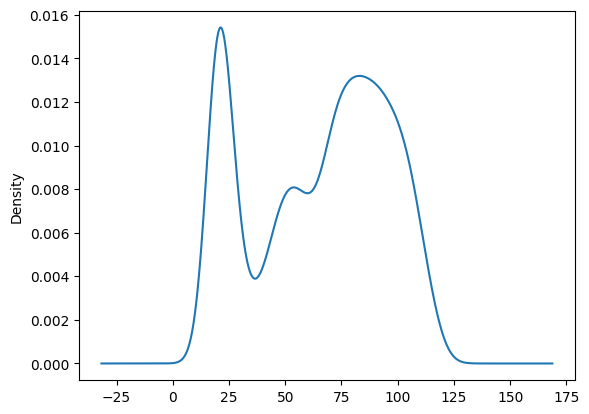

In [26]:
concat_df["MonthlyCharges"].plot(kind= "kde")

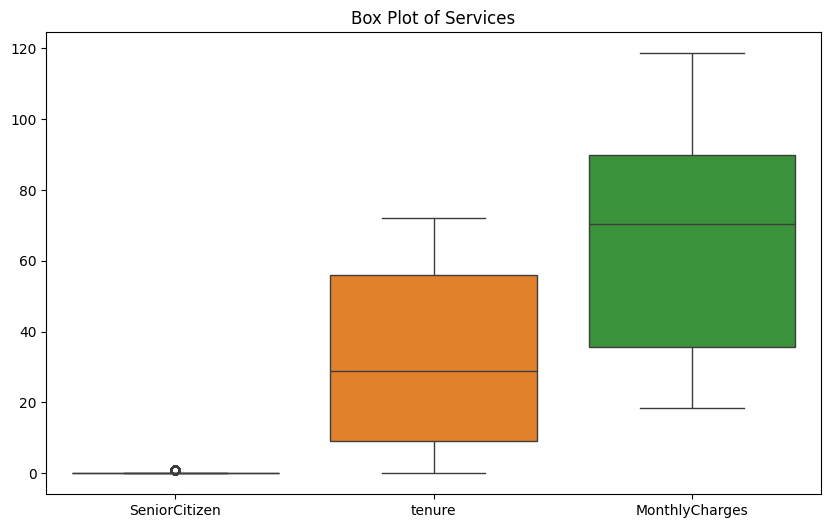

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=concat_df)
plt.title('Box Plot of Services')
plt.show()

### Insights

- SeniorCitizen:
The variable takes values of 0 and 1, representing non-senior and senior citizens.To explore the impact of being a senior citizen on customer behavior or preferences.

- Tenure:
The minimum tenure is 0, and the maximum is 72. To investigate customers with very short or long tenures to understand factors contributing to their behavior.

- MonthlyCharges:
Monthly charges range from $18.40 to $118.65.To explore customer segments with high or low monthly charges and tailor strategies accordingly.

### 2.3.2.2 Bivariate Analysis
     Investigating  relationships between pairs of variables.

In [28]:
correlation = concat_df.corr (numeric_only=True)

correlation 

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.004597,0.221780
tenure,0.004597,1.000000,0.240645
MonthlyCharges,0.221780,0.240645,1.000000


<Axes: >

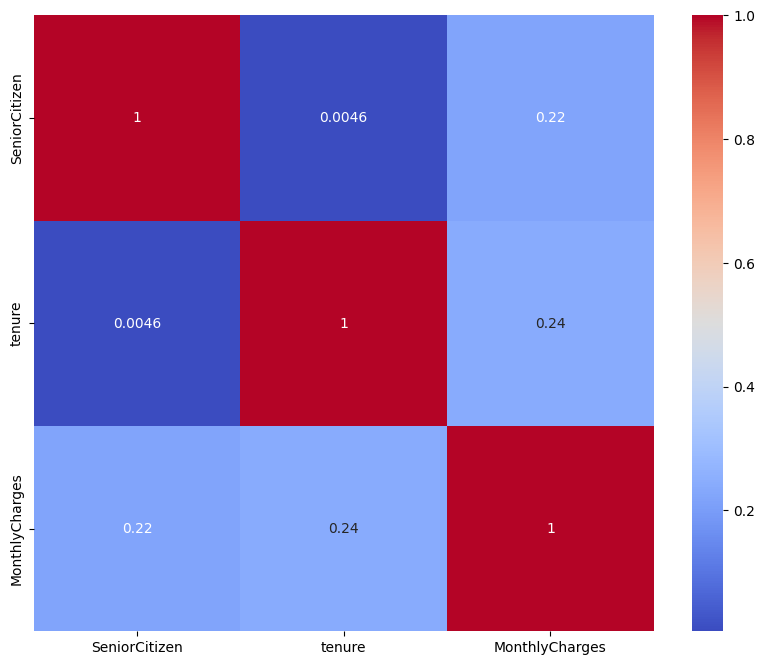

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(data = correlation ,annot = True,cmap = 'coolwarm')

### Key insights

- The tenure column is not crrelated with seniorcitezen table
- Tenure and Seniorcitezen is fairly correlated

### 2.3.2.3 Multivariate Analysis:**
     Examining interactions between three or more variables.

In [30]:
concat_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

*** Check the relevant columns in relation to your hypothesis and make observations

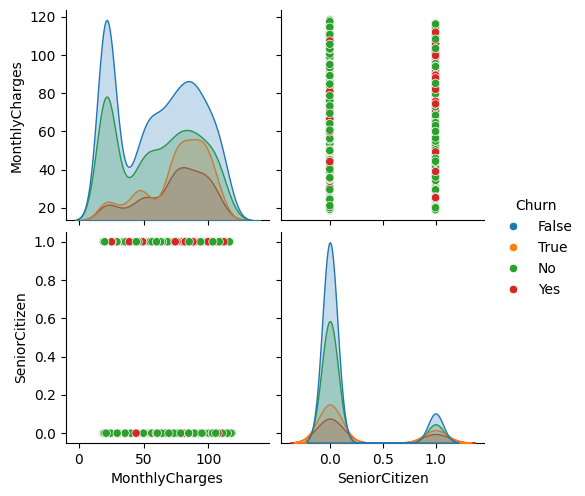

In [31]:
data = concat_df[['Churn','TotalCharges','MonthlyCharges','customerID','Partner','SeniorCitizen']]

sns.pairplot(data,hue='Churn')

** do multipple code blocks to generate answers to our hypothesis

### Answering analytical questions

***All answers should include visualizations

In [32]:
concat_df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False


Q1.How do different services (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, etc.) contribute to customer churn?

In [33]:
concat_count= concat_df.groupby(['InternetService', 'Churn']).size().unstack()
concat_count

Churn,False,True,No,Yes
InternetService,,,,
DSL,835,171,571,138
Fiber optic,772,570,524,381
No,612,39,392,37


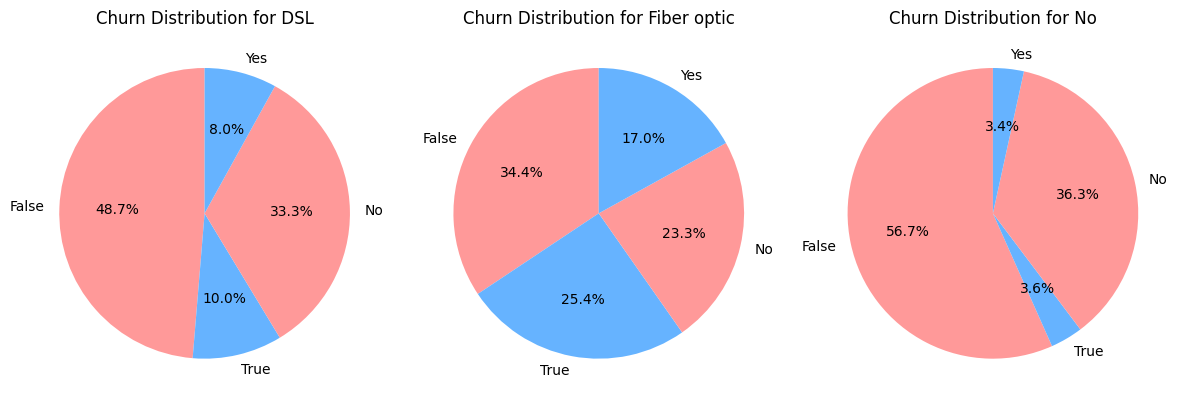

In [34]:
# Plot a pie chart for each internet service category
plt.figure(figsize=(12, 5))

for i, service_type in enumerate(concat_count.index):
    plt.subplot(1, 3, i + 1)
    plt.pie(concat_count.loc[service_type], labels=concat_count.columns, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
    plt.title(f'Churn Distribution for {service_type}')

plt.tight_layout()
plt.show()

Key Insights and Recommendations
- Most of the customers who churned had not subscribed for any internet service:
We recommend that the company with marketing strategies that would attract more customers to subscribe for internet services

Q2.Is there any correlation between gender, age (SeniorCitizen), having a partner, having dependents, and customer churn?

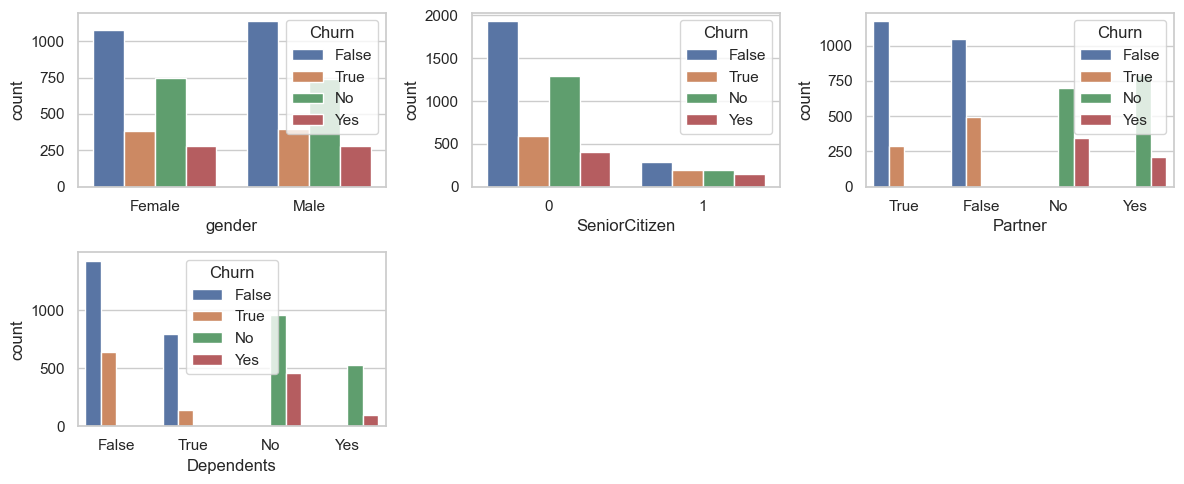

In [35]:
sns.set(style="whitegrid")

# Plotting gender distribution
plt.figure(figsize=(12, 5))
plt.subplot(2, 3, 1)
sns.countplot(x='gender', hue='Churn', data=concat_df)

# Plotting SeniorCitizen distribution
plt.subplot(2, 3, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=concat_df)

# Plotting Partner distribution
plt.subplot(2, 3, 3)
sns.countplot(x='Partner', hue='Churn', data=concat_df)

# Plotting Dependents distribution
plt.subplot(2, 3, 4)
sns.countplot(x='Dependents', hue='Churn', data=concat_df)


# Adjust layout
plt.tight_layout()
plt.show()

Key Insights and Recommendations:
- The male gender is less likely to churn as compared to females
- Seniorcitizens are less likely to churn
- The customers with partners are more likely to churn than the customers without partners
- Customers with dependants are more likely to churn than the ones without

Q3 How does the contract type (Contract) and billing preferences (PaperlessBilling, PaymentMethod) influence customer churn?

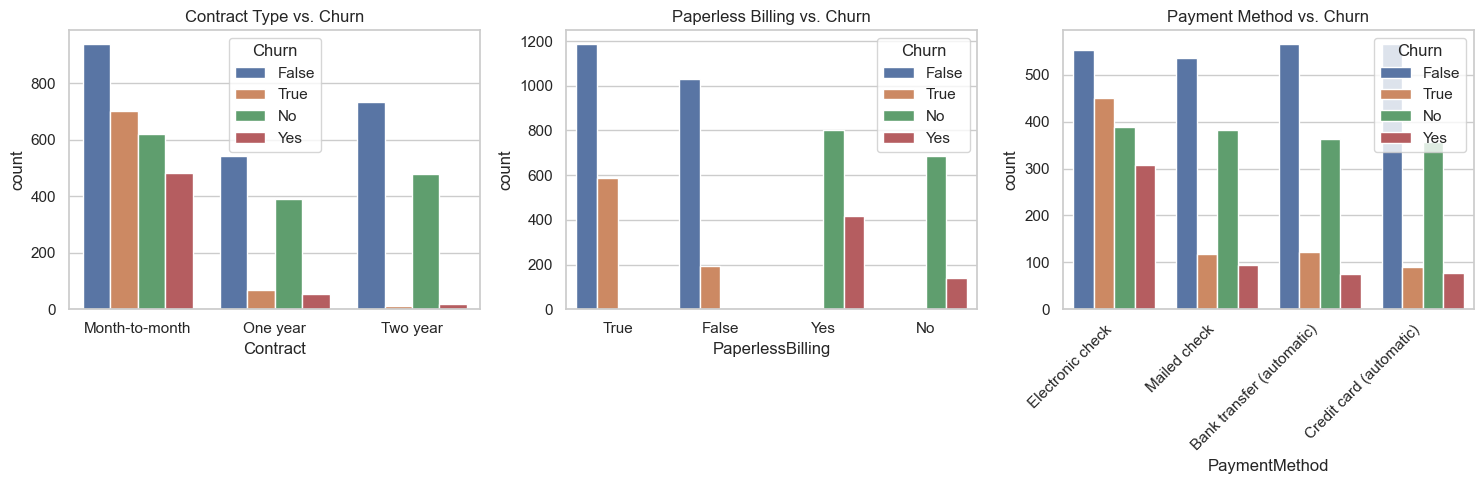

In [36]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Plotting contract type distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Contract', hue='Churn', data=concat_df)
plt.title('Contract Type vs. Churn')

# Plotting paperless billing distribution
plt.subplot(1, 3, 2)
sns.countplot(x='PaperlessBilling', hue='Churn', data=concat_df)
plt.title('Paperless Billing vs. Churn')

# Plotting payment method distribution
plt.subplot(1, 3, 3)
sns.countplot(x='PaymentMethod', hue='Churn', data=concat_df)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Payment Method vs. Churn')

# Adjust layout
plt.tight_layout()
plt.show()

Key Insights and recommendations:
- Customers with month to month contract type are likely to churn as compared to customers with long term contracts of one year and above
- The company should consider giving incentives to long term contracts to attract more customers to subscribe

Q4. Is there a correlation between monthly charges (MonthlyCharges), total charges (TotalCharges), and customer churn?

In [37]:
# Identify missing or invalid values in 'TotalCharges'
invalid_values = concat_df['TotalCharges'].loc[concat_df['TotalCharges'].str.strip() == ""]
print("Invalid values in 'TotalCharges':", invalid_values)

# Replace empty strings with NaN and convert 'TotalCharges' to numeric
concat_df['TotalCharges'] = pd.to_numeric(concat_df['TotalCharges'].replace(" ", np.nan))

Invalid values in 'TotalCharges': 3218     
4670     
4754     
Name: TotalCharges, dtype: object


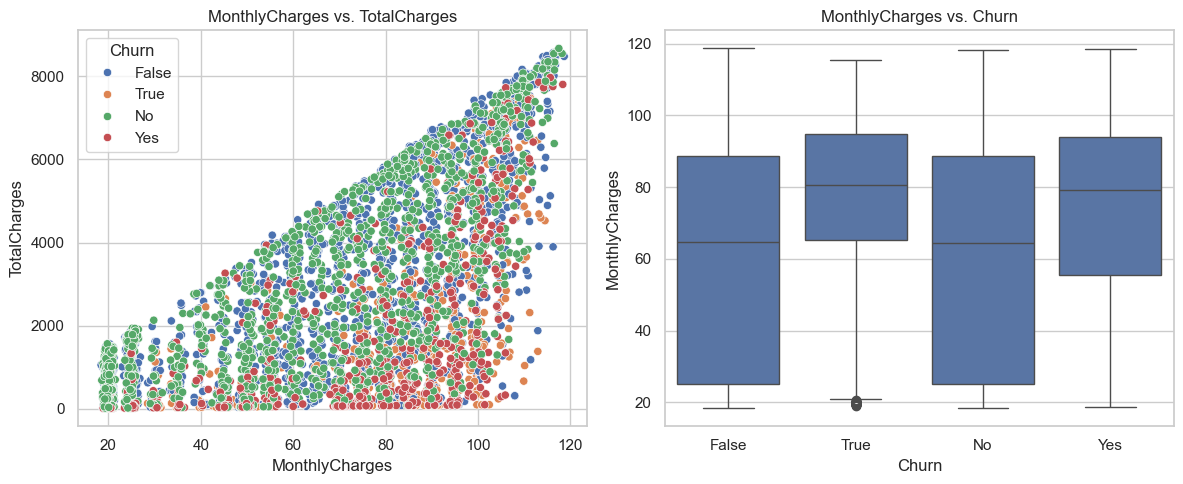

In [38]:
sns.set(style="whitegrid")

# Scatter plot for MonthlyCharges vs. TotalCharges
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=concat_df)
plt.title('MonthlyCharges vs. TotalCharges')

# Box plot for MonthlyCharges vs. Churn
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=concat_df)
plt.title('MonthlyCharges vs. Churn')

# Adjust layout
plt.tight_layout()
plt.show()

Key Insights:
- The monthly charges seem to have a correlation with the totalcharges , they seem to have a positive correlation with churn rate

In [39]:
corr = concat_df['MonthlyCharges'].corr(concat_df['TotalCharges'])
print(f"Correlation between MonthlyCharges and TotalCharges: {correlation}")

Correlation between MonthlyCharges and TotalCharges:                 SeniorCitizen    tenure  MonthlyCharges
SeniorCitizen        1.000000  0.004597        0.221780
tenure               0.004597  1.000000        0.240645
MonthlyCharges       0.221780  0.240645        1.000000


Q5. Is there a relationship between gender and the churn rate?

In [40]:
concat_df.groupby('gender')['Churn'].value_counts()

gender  Churn
Female  False    1079
        No        744
        True      384
        Yes       277
Male    False    1140
        No        743
        True      396
        Yes       279
Name: count, dtype: int64

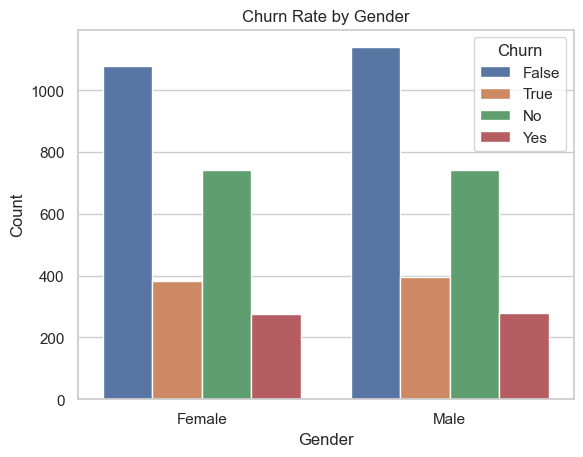

In [41]:
sns.countplot(x='gender', hue='Churn', data=concat_df)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Rate by Gender')

# Show the plot
plt.show()

Q6. How does internet service affect churn rate?

Text(0, 0.5, 'Count')

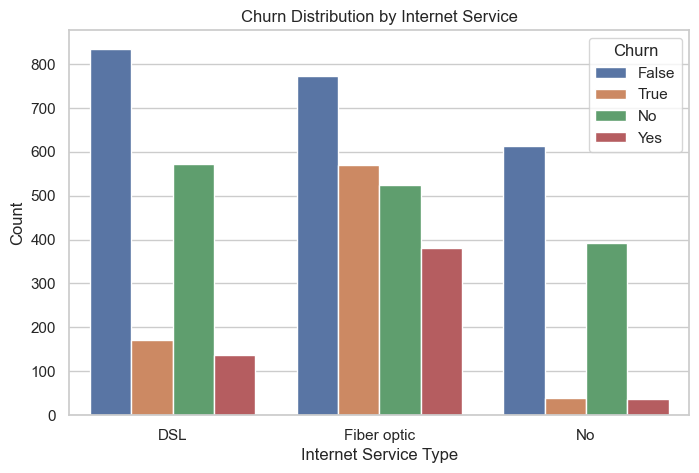

In [42]:
sns.set(style="whitegrid")

# Count plot for Churn based on InternetService
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=concat_df)
plt.title('Churn Distribution by Internet Service')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')

Q7.Are senior citizens more likely to churn

Text(0, 0.5, 'Count')

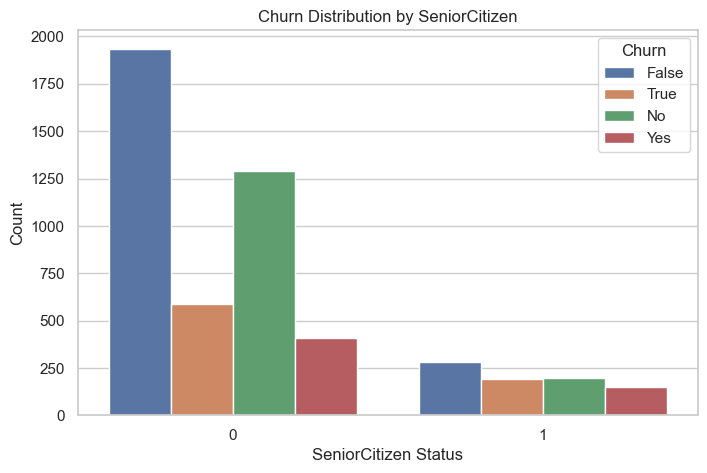

In [43]:
sns.set(style="whitegrid")

# Count plot for Churn based on SeniorCitizen status
plt.figure(figsize=(8, 5))
sns.countplot(x='SeniorCitizen', hue='Churn', data=concat_df)
plt.title('Churn Distribution by SeniorCitizen')
plt.xlabel('SeniorCitizen Status')
plt.ylabel('Count')

## Data preparation

In [46]:
concat_df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
